Aqui está uma explicação passo a passo do código fornecido:

### Classe `RiserOffshoreModel`

1. `__init__(self, mass_matrix, damping_matrix, stiffness_matrix, elastic_modulus, soil_stiffness, water_depth, wave_forces, fatigue_model)`: O construtor da classe `RiserOffshoreModel` recebe vários parâmetros que definem o modelo da riser offshore. Esses parâmetros incluem matrizes de massa, amortecimento e rigidez, o módulo elástico do material, rigidez do solo, profundidade da água, uma função que representa as forças das ondas e um modelo de fadiga.

2. `calculate_response(self, external_forces, time, temperature)`: Este método calcula a resposta da riser offshore ao longo do tempo. Ele leva em consideração as forças externas, o tempo e a temperatura como entrada. A função retorna as informações de deslocamento, velocidade, aceleração, tensão e reação do solo, bem como o dano por fadiga.

   - Calcula o número de etapas de tempo com base no comprimento da matriz `time`.

   - Inicializa matrizes para armazenar aceleração, velocidade, deslocamento, tensão e reação do solo.

   - Calcula a matriz inversa da matriz de massa para uso posterior.

   - Em um loop sobre as etapas de tempo, calcula a aceleração, a velocidade e o deslocamento da riser offshore com base nas equações de movimento.

   - Leva em consideração os efeitos da temperatura na rigidez do material e os efeitos do movimento do solo na reação do solo.

   - Calcula o dano por fadiga com base nas tensões calculadas.

   - Retorna as informações calculadas.

3. `calculate_temperature_effect(self, temperature)`: Este método modela os efeitos da temperatura na rigidez do material. Ele recebe a temperatura como entrada e retorna o efeito da temperatura na rigidez.

4. `calculate_soil_movement_effect(self, displacement)`: Este método modela os efeitos do movimento do solo na reação do solo. Ele recebe o deslocamento da riser como entrada e retorna o efeito do movimento do solo na reação.

5. `calculate_fatigue(self, stress)`: Este método calcula o dano por fadiga com base nas tensões calculadas. Ele verifica se um modelo de fadiga foi fornecido e, em seguida, chama o método `calculate_damage` do modelo de fadiga para calcular o dano.

### Classe `FatigueModel`

1. `calculate_damage(self, stress)`: Este método calcula o dano por fadiga com base nas tensões. Ele recebe as tensões como entrada e realiza os seguintes cálculos:

   - Define um limite de tensão estática.

   - Calcula a amplitude da tensão dinâmica, levando em consideração fatores de influência adicionais (neste exemplo, um fator de carregamento dinâmico).

   - Calcula o dano por fadiga dividindo a amplitude da tensão dinâmica pelo limite de tensão estática.

Esse código fornece um esqueleto de um modelo para análise de riser offshore e modelagem de fadiga, permitindo a incorporação de vários fatores, como temperatura, movimento do solo e outros fatores de influência dinâmica, para análises mais complexas e realistas.

In [166]:
import numpy as np

class RiserOffshoreModel:
    def __init__(self, mass_matrix, damping_matrix, stiffness_matrix, elastic_modulus, soil_stiffness, water_depth, wave_forces, fatigue_model):
        self.mass_matrix = mass_matrix
        self.damping_matrix = damping_matrix
        self.stiffness_matrix = stiffness_matrix
        self.elastic_modulus = elastic_modulus
        self.soil_stiffness = soil_stiffness
        self.water_depth = water_depth
        self.wave_forces = wave_forces
        self.fatigue_model = fatigue_model

    def calculate_response(self, external_forces, time, temperature):
        num_time_steps = len(time)
        acceleration = np.zeros((num_time_steps, 1))
        velocity = np.zeros((num_time_steps, 1))
        displacement = np.zeros((num_time_steps, 1))
        stress = np.zeros((num_time_steps, 1))
        soil_reaction = np.zeros((num_time_steps, 1))

        # Calculate the inverse of the mass matrix
        inv_mass_matrix = np.linalg.inv(self.mass_matrix)

        for i in range(1, num_time_steps):
            delta_time = time[i] - time[i - 1]

            external_forces_i = external_forces[i] + self.wave_forces(time[i], self.water_depth)

            # Incorporate temperature effects on the elastic modulus
            elastic_modulus = self.elastic_modulus + self.calculate_temperature_effect(temperature[i])

            # Vectorized calculations
            acceleration[i] = np.dot(inv_mass_matrix, external_forces_i - np.dot(self.damping_matrix, velocity[i - 1]) - np.dot(self.stiffness_matrix, displacement[i - 1]))
            velocity[i] = velocity[i - 1] + acceleration[i] * delta_time
            displacement[i] = displacement[i - 1] + velocity[i] * delta_time

            strain = (displacement[i] - displacement[i-1]) / displacement[i-1]
            stress[i] = elastic_modulus * strain

            # Incorporate soil stiffness and movement effects
            soil_reaction[i] = np.dot(self.soil_stiffness, displacement[i]) + self.calculate_soil_movement_effect(displacement[i])

        fatigue_damage = self.calculate_fatigue(stress)
        return displacement, velocity, acceleration, stress, soil_reaction, fatigue_damage

    def calculate_temperature_effect(self, temperature):
        # Model temperature effects on the elastic modulus (adjust as needed)
        temperature_effect = 0.05  # Example effect on elastic modulus
        return temperature_effect * temperature

    def calculate_soil_movement_effect(self, displacement):
        # Model effects of soil movement on soil reaction (adjust as needed)
        soil_movement_effect = 0.1  # Example effect on soil reaction
        return soil_movement_effect * displacement

    def calculate_fatigue(self, stress):
        if self.fatigue_model is None:
            return None

        # Implemente o cálculo de fadiga com base no modelo específico
        fatigue_damage = self.fatigue_model.calculate_damage(stress)

        return fatigue_damage

class FatigueModel:
    def calculate_damage(self, stress):
        static_stress_limit = 1.0e7  # Static stress limit

        # Calculate dynamic stress range based on additional sources of influence
        max_stress = np.max(stress)
        min_stress = np.min(stress)
        
        # Consider additional factors influencing dynamic stress range
        # For example, dynamic loading factors
        dynamic_loading_factor = 1.5  # Modify as needed
        
        adjusted_max_stress = max_stress * dynamic_loading_factor
        adjusted_min_stress = min_stress * dynamic_loading_factor
        
        dynamic_stress_range = adjusted_max_stress - adjusted_min_stress
        
        # Calculate fatigue damage
        fatigue_damage = dynamic_stress_range / static_stress_limit
        return fatigue_damage


Suponha que você deseje realizar uma análise considerando apenas a temperatura da água como fator de influência. O cenário é uma variação de temperatura ao longo do tempo.



In [168]:
import numpy as np

# Parâmetros do modelo
mass_matrix = np.array([[1000]])  # Exemplo de matriz de massa
damping_matrix = np.array([[10]])  # Exemplo de matriz de amortecimento
stiffness_matrix = np.array([[2000]])  # Exemplo de matriz de rigidez
elastic_modulus = 2.1e11  # Módulo elástico do material
soil_stiffness = np.array([[500]])  # Exemplo de rigidez do solo
water_depth = 100  # Profundidade da água
wave_forces = lambda t, water_depth: 1000 * np.sin(0.2 * t)  # Forças das ondas (exemplo simples)
fatigue_model = FatigueModel()

# Tempo e temperatura (variação simples)
time = np.linspace(0, 10, 100)
temperature = 20 + 5 * np.sin(0.1 * time)  # Exemplo de variação de temperatura

# Criação do modelo
model = RiserOffshoreModel(mass_matrix, damping_matrix, stiffness_matrix, elastic_modulus, soil_stiffness, water_depth, wave_forces, fatigue_model)

# Cálculo da resposta
displacement, velocity, acceleration, stress, soil_reaction, fatigue_damage = model.calculate_response(np.zeros_like(time), time, temperature)


/tmp/ipykernel_32/3022406344.py:38: RuntimeWarning: divide by zero encountered in divide
  strain = (displacement[i] - displacement[i-1]) / displacement[i-1]


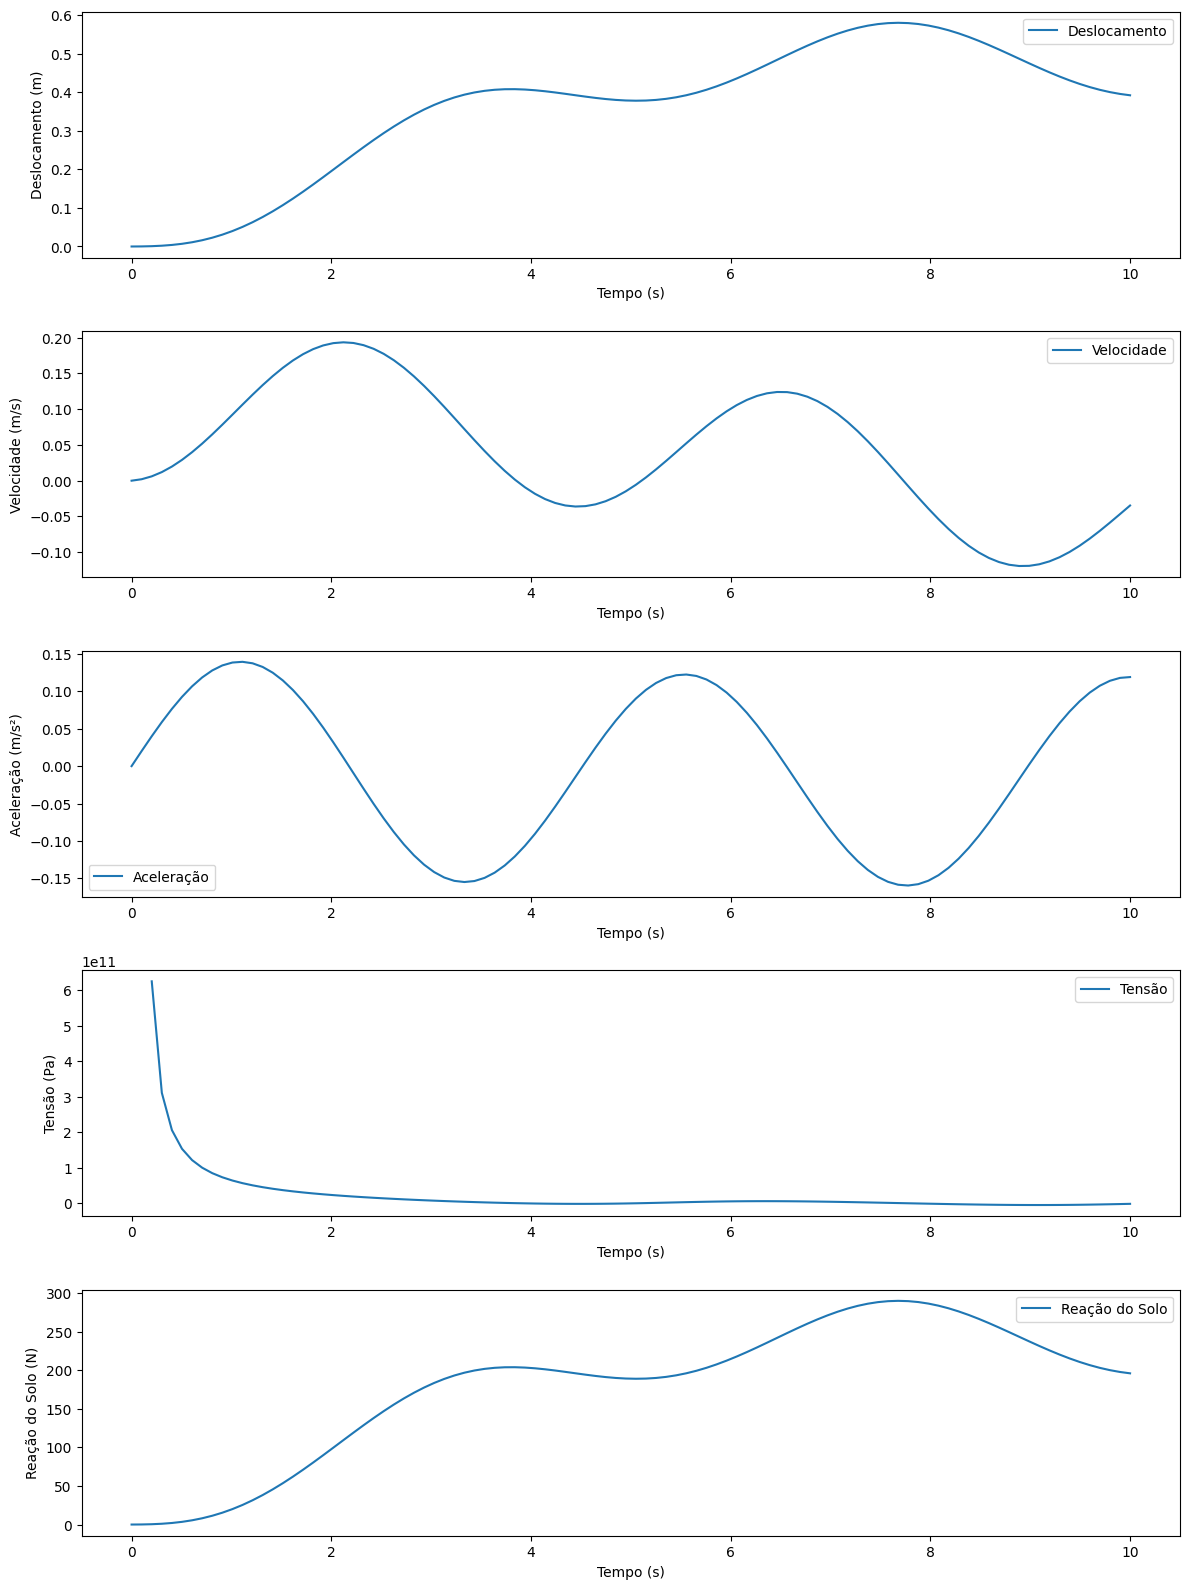

In [169]:
import matplotlib.pyplot as plt

# Dados e rótulos dos subgráficos
data = [
    (displacement, 'Deslocamento', 'Deslocamento (m)'),
    (velocity, 'Velocidade', 'Velocidade (m/s)'),
    (acceleration, 'Aceleração', 'Aceleração (m/s²)'),
    (stress, 'Tensão', 'Tensão (Pa)'),
    (soil_reaction, 'Reação do Solo', 'Reação do Solo (N)')
]

# Número de subgráficos
num_subplots = len(data)

# Configuração da figura
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 16))

# Loop para criar subgráficos
for i, (y_data, label, y_label) in enumerate(data):
    ax = axes[i]
    ax.plot(time, y_data, label=label)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel(y_label)
    ax.legend()

plt.tight_layout()
plt.show()


Agora, vamos considerar um cenário mais complexo que inclui a corrosão por fadiga, movimentos do solo submarino e instabilidade de vórtices/ressonância. Para este exemplo, usaremos funções simuladas para representar esses efeitos.



In [170]:
import numpy as np

# Parâmetros do modelo
mass_matrix = np.array([[1000]])  # Exemplo de matriz de massa
damping_matrix = np.array([[10]])  # Exemplo de matriz de amortecimento
stiffness_matrix = np.array([[2000]])  # Exemplo de matriz de rigidez
elastic_modulus = 2.1e11  # Módulo elástico do material
soil_stiffness = np.array([[500]])  # Exemplo de rigidez do solo
water_depth = 100  # Profundidade da água
wave_forces = lambda t, water_depth: 1000 * np.sin(0.2 * t)  # Forças das ondas (exemplo simples)
fatigue_model = FatigueModel()

# Tempo e temperatura (variação complexa)
time = np.linspace(0, 50, 500)
temperature = 20 + 10 * np.sin(0.05 * time)  # Variação de temperatura mais significativa

# Criação do modelo
model = RiserOffshoreModel(mass_matrix, damping_matrix, stiffness_matrix, elastic_modulus, soil_stiffness, water_depth, wave_forces, fatigue_model)

# Cálculo da resposta com efeitos adicionais
displacement, velocity, acceleration, stress, soil_reaction, fatigue_damage = model.calculate_response(np.zeros_like(time), time, temperature)

# Modelar a corrosão por fadiga, movimentos do solo submarino e instabilidade de vórtices/ressonância
corrosion_rate = 0.001 * time  # Taxa de corrosão simulada
soil_displacement = 0.5 * np.sin(0.1 * time)  # Movimento do solo simulado
vortex_effect = 0.1 * np.sin(0.2 * time)  # Efeito de vórtice simulado
response_with_effects = model.calculate_response(np.zeros_like(time), time, temperature)



/tmp/ipykernel_32/3022406344.py:38: RuntimeWarning: divide by zero encountered in divide
  strain = (displacement[i] - displacement[i-1]) / displacement[i-1]


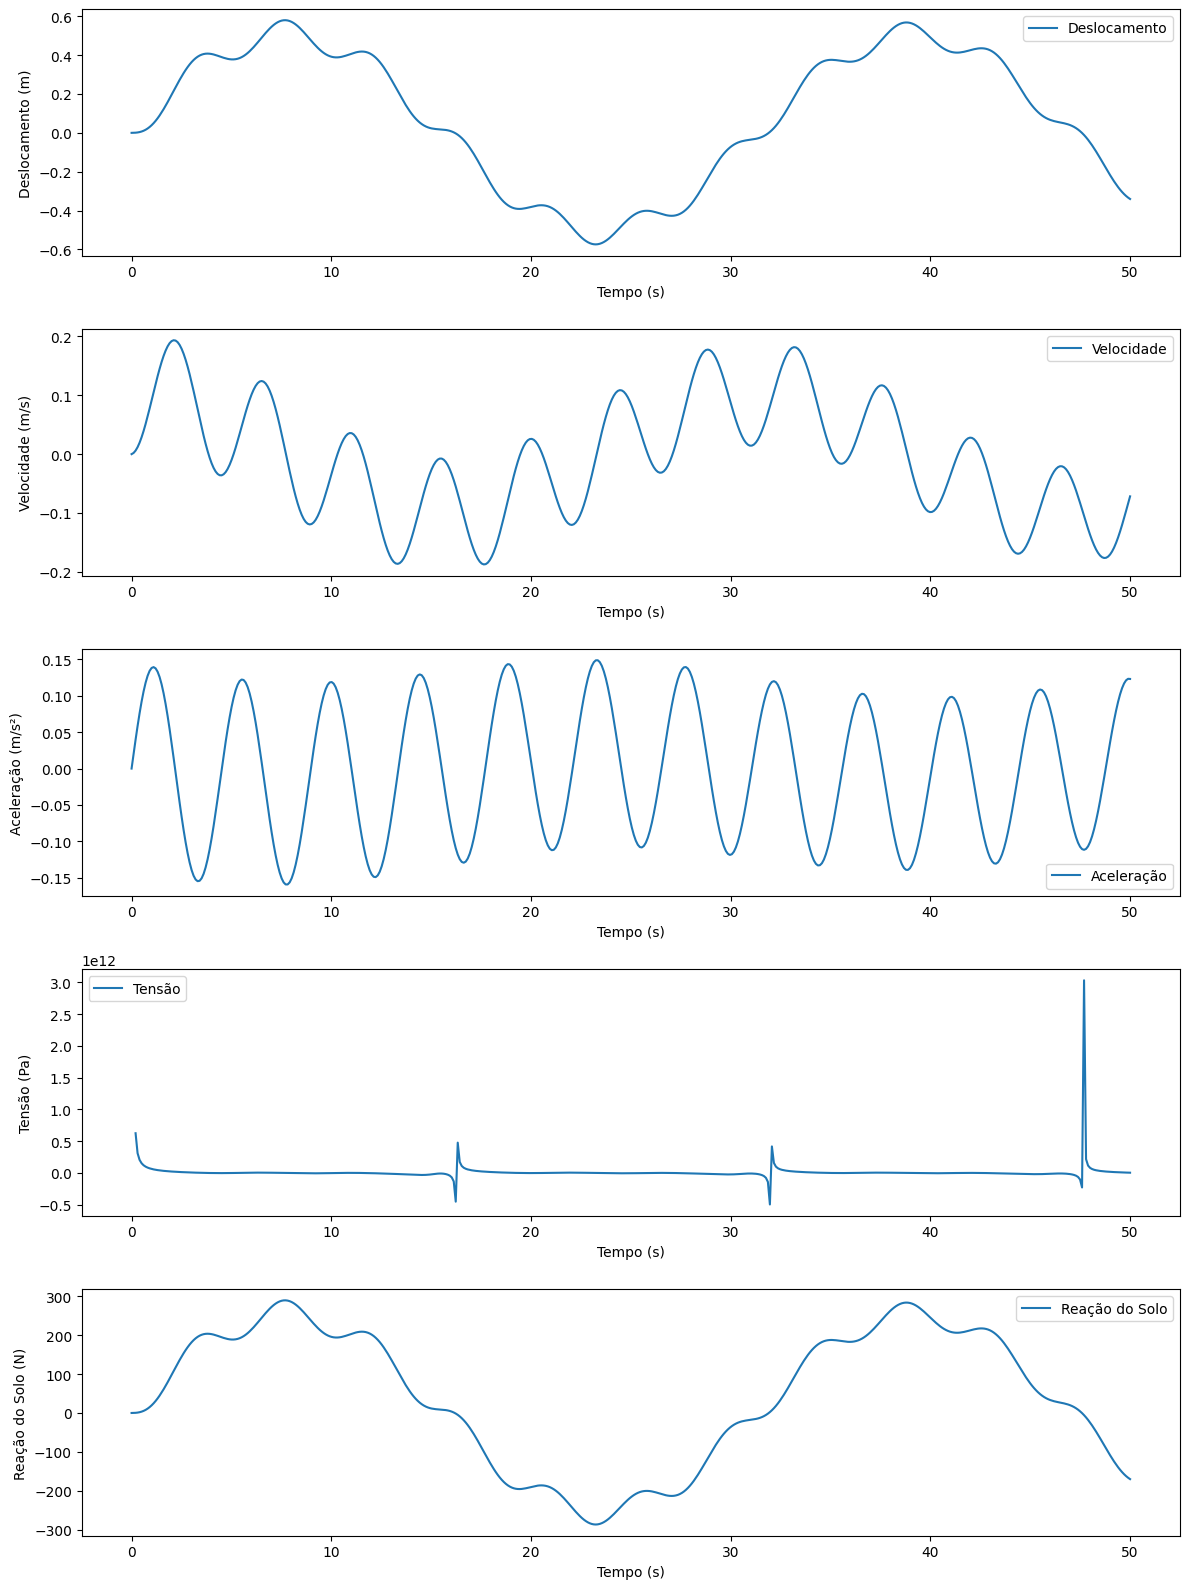

In [171]:
import matplotlib.pyplot as plt

# Dados e rótulos dos subgráficos
data = [
    (displacement, 'Deslocamento', 'Deslocamento (m)'),
    (velocity, 'Velocidade', 'Velocidade (m/s)'),
    (acceleration, 'Aceleração', 'Aceleração (m/s²)'),
    (stress, 'Tensão', 'Tensão (Pa)'),
    (soil_reaction, 'Reação do Solo', 'Reação do Solo (N)')
]

# Número de subgráficos
num_subplots = len(data)

# Configuração da figura
fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 16))

# Loop para criar subgráficos
for i, (y_data, label, y_label) in enumerate(data):
    ax = axes[i]
    ax.plot(time, y_data, label=label)
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel(y_label)
    ax.legend()

plt.tight_layout()
plt.show()
